In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
import xray_emissivity

In [3]:
# eROSITA repsonse files from https://wiki.mpe.mpg.de/eRosita/erocalib_calibration
rmffile = './responses/rmf01_sdtq.fits'
arffile = './responses/arf01_200nmAl_sdtq.fits'
#xray = xray_emissivity.XrayEmissivity(energy_range=[0.01,12.0], num_ebins=101, rmf=rmffile, arf=arffile, 
#                                        use_energy_unit=True)
xray = xray_emissivity.XrayEmissivity(energy_range=[0.5,2.0], num_ebins=101, rmf=None, arf=None, 
                                      use_energy_unit=False )

In [4]:
xray.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )
xray.save_emissivity_table("./data/etable_05_2keV_cnts")
#xray.save_emissivity_table("./data/etable")

  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


100%|██████████| 101/101 [04:40<00:00,  2.78s/it]

Saving emissivity table as etable_05_2keV_cnts.hdf5


In [7]:
# Read table from file
xray.read_emissivity_table('./data/etable_erosita.hdf5')
print (xray.emin, xray.emax)

0.1 12.0


In [10]:
kT = np.array([0.01,0.1])
metal = np.array([1.0,1.0])
emiss = xray.return_interpolated_emissivity(kT, metal)
print (emiss)

[1.29938440e-19 7.20657625e-13]


<ipython-input-17-7264804d7d9e>:11: RuntimeWarning: divide by zero encountered in log10
  c = ax.imshow(np.log10(xray.etable.T), origin="lower", extent=extent, aspect='auto')


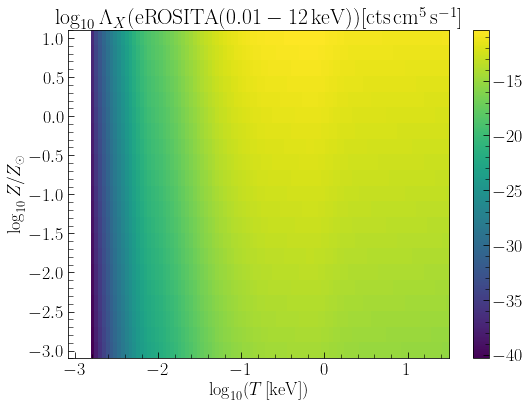

In [17]:
# Plot showing the emissivity table

ltbins = np.log10(xray.tbins)
lzbins = np.log10(xray.zbins)
dx = (ltbins[1]-ltbins[0])/2.
dy = (lzbins[1]-lzbins[0])/2.
extent = [ltbins[0]-dx, ltbins[-1]+dx, lzbins[0]-dy, lzbins[-1]+dy]

fig, ax= plt.subplots()

c = ax.imshow(np.log10(xray.etable.T), origin="lower", extent=extent, aspect='auto')
plt.colorbar(c)

ax.set_xlabel(r'$\log_{10}(T\,[{\rm keV}])$')
ax.set_ylabel(r'$\log_{10}Z/Z_\odot$')
#ax.set_title(r'$\log_{10}\Lambda_{X}(0.01-12\,{\rm keV})[{\rm erg\,s^{-1}cm^3}]$')
ax.set_title(r'$\log_{10}\Lambda_{X}({\rm eROSITA}(0.01-12\,{\rm keV}))[{\rm cts\,cm^5\,s^{-1}}]$')


plt.tight_layout()
plt.show()